## IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
%pylab inline  

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


## IMPORTING DATA FROM EXCEL FILE

Importing the file and checking the file for null values and outliers.

In [2]:
data= pd.read_excel("ML.xlsx")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.count()

Hours     25
Scores    25
dtype: int64

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

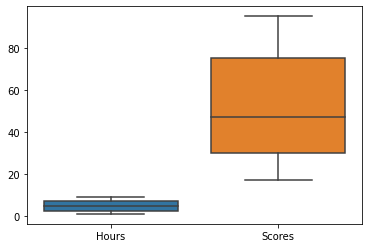

In [5]:
sns.boxplot( data=data)

#### Since no null values or outliers are present, no preprocessing is required for the data. 

## CHECKING THE CORRELATION BETWEEN VARIABLES

In [6]:
X = pd.DataFrame()
X['Hours'] = data['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [7]:
y = data['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

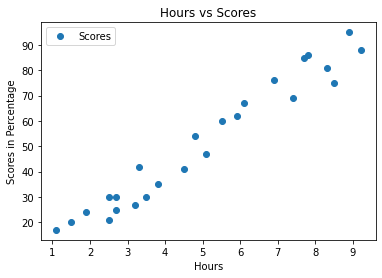

In [8]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores in Percentage')  
plt.show()

#### This scatter plot shows a high positive relation between the variables "Scores" and "Hours". 

#### To find out the correlation coefficient between the columns in the dataframe, we shall use:

(Note: Correlation of a variable with itself is 1.)

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### For better visualization:

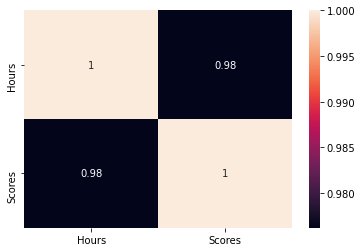

In [10]:
sns.heatmap(data.corr(),annot = True);

Correlation coefficient can range between -1 (negatively perfetly correlated) to +1 (positively perfectly correlated). 

#### Conclusion: The correlation matrix and the heatmap of the same further proves that there is a positive correlation between the variables with 0.98 as the correlation coefficient. 

## SPLITTING THE DATA INTO TRAIN AND TEST

Training data= 70%,
Testing data= 30%

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
display (X_train[:5])
print ()
display (X_test[:5])
print ()
display (y_train[:5])
print ()
display (y_test[:5])

,Hours
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9


,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


22    35
5     20
2     27
12    41
15    95
Name: Scores, dtype: int64

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


## FITTING THE DATA INTO A LINEAR REGRESSION MODEL

In [14]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

print (linreg.intercept_)
print (linreg.coef_)

2.794196676599803
[9.71054094]


In [15]:
y_pred = linreg.predict(X_test)
print (y_pred[:5])

[83.39168645 27.07054902 27.07054902 69.79692914 60.0863882 ]


In [16]:
print (X_test[:1])
print ()
print (y_pred[:5]) # prediction
print ()
print (y_test[:5]) # actual

   Hours
8    8.3

[83.39168645 27.07054902 27.07054902 69.79692914 60.0863882 ]

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64


## CHECKING THE ACCURACY OF THE  MODEL

In [17]:
print ("Rsqd = ", r2_score(y_pred, y_test))


print("RMSE = ", np.sqrt(mean_squared_error(y_pred, y_test)))

print('MAE:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Rsqd =  0.9427788055899853
RMSE =  4.859985351228103
MAE: 4.499999999999998


#### This model gives a high RSQD value and low RMSE and MAE values which is a good indicator for the algorithm.

## PREDICTING USING THE ALGORITHM

We shall now predict the percentage score that a student could get if he/she studied for 9.25 hours:

In [18]:
hours= 9.25
linreg.predict([[hours]])

array([92.61670034])

In [19]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(linreg.predict([[hours]])))

No of Hours = 9.25
Predicted Score = [92.61670034]


#### As per the supervised machine learning alogorithim, if a student studies for 9.25 hours, he/she may score approximately 92.62%.